# Fundamental Data Analysis

## Assignment 3

## Kaijiang Chen

### Working with Data and Code (52685)

### University of Technology Sydney

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## Load Weather Data

In [2]:
# Reading the weather data using pandas library
weather_df = pd.read_csv("Weather Data.csv")

print ("The shape of the weather data -", weather_df.shape)

print ("\nTop five observations from the weather data -")
weather_df.head()

The shape of the weather data - (99516, 23)

Top five observations from the weather data -


,row ID,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,Row0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0
1,Row1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0
2,Row2,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0
3,Row3,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,...,55.0,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,No,0
4,Row4,Albury,7.7,26.7,0.0,NaN,NaN,W,35.0,SSE,...,48.0,19.0,1013.4,1010.1,NaN,NaN,16.3,25.5,No,0


In [3]:
print("The data-specific information of weather data -\n")
weather_df.info()

The data-specific information of weather data -

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99516 entries, 0 to 99515
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   row ID         99516 non-null  object 
 1   Location       99516 non-null  object 
 2   MinTemp        99073 non-null  float64
 3   MaxTemp        99286 non-null  float64
 4   Rainfall       98537 non-null  float64
 5   Evaporation    56985 non-null  float64
 6   Sunshine       52199 non-null  float64
 7   WindGustDir    92995 non-null  object 
 8   WindGustSpeed  93036 non-null  float64
 9   WindDir9am     92510 non-null  object 
 10  WindDir3pm     96868 non-null  object 
 11  WindSpeed9am   98581 non-null  float64
 12  WindSpeed3pm   97681 non-null  float64
 13  Humidity9am    98283 non-null  float64
 14  Humidity3pm    97010 non-null  float64
 15  Pressure9am    89768 non-null  float64
 16  Pressure3pm    89780 non-null  float64
 17  C

## Initial Analysis

In [4]:
# Analyzing the null values and duplicate rows in the DataFrame.
def analyze_data(df):
    # Analyze null values
    null_analysis_df = pd.DataFrame(df.isnull().sum(), columns=['Null Count'])
    null_analysis_df = null_analysis_df[null_analysis_df['Null Count'] > 0].sort_values(by='Null Count', ascending=False)
    
    # Calculate number of unique values for columns with nulls
    null_analysis_df['Unique Values'] = [df[col].nunique() for col in null_analysis_df.index]
    
    # Identify duplicate rows
    duplicates_df = df[df.duplicated(keep=False)]  # keep=False will mark all duplicates as True

    return null_analysis_df, duplicates_df

In [5]:
null_analysis, duplicates = analyze_data(weather_df)

# Printing the analysis results
print("Null Values Analysis:")
print(null_analysis)

if not duplicates.empty:
    print("\nDuplicate Rows:")
    print(duplicates)
else:
    print("\nNo duplicate rows found.")

Null Values Analysis:
               Null Count  Unique Values
Sunshine            47317            145
Evaporation         42531            327
Cloud3pm            40002             10
Cloud9am            37572             10
Pressure9am          9748            536
Pressure3pm          9736            536
WindDir9am           7006             16
WindGustDir          6521             16
WindGustSpeed        6480             67
WindDir3pm           2648             16
Humidity3pm          2506            101
Temp3pm              1904            491
WindSpeed3pm         1835             44
Humidity9am          1233            101
RainToday             979              2
Rainfall              979            601
WindSpeed9am          935             43
Temp9am               614            432
MinTemp               443            386
MaxTemp               230            500

No duplicate rows found.


## Data Pre-processing

In [6]:
# Droping the 'row ID' column
weather_df.drop(columns=['row ID'], inplace=True)
weather_df.columns

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [7]:
# Converting 'RainTomorrow' from numeric to categorical
weather_df['RainTomorrow'] = weather_df['RainTomorrow'].replace({0: 'No', 1: 'Yes'})

# Verifying the changes
print(weather_df['RainTomorrow'].value_counts())

No     77157
Yes    22359
Name: RainTomorrow, dtype: int64


In [8]:
# Imputing RainToday values from the RainTomorrow values
weather_df['RainToday'] = weather_df['RainToday'].fillna(weather_df['RainTomorrow'].shift())

# Checking null values from the imputed weather data
print(weather_df.isnull().sum())

Location             0
MinTemp            443
MaxTemp            230
Rainfall           979
Evaporation      42531
Sunshine         47317
WindGustDir       6521
WindGustSpeed     6480
WindDir9am        7006
WindDir3pm        2648
WindSpeed9am       935
WindSpeed3pm      1835
Humidity9am       1233
Humidity3pm       2506
Pressure9am       9748
Pressure3pm       9736
Cloud9am         37572
Cloud3pm         40002
Temp9am            614
Temp3pm           1904
RainToday            0
RainTomorrow         0
dtype: int64


In [9]:
# Imputing missing values in a DataFrame.
def impute_missing_values(df):  
    for column in df.columns:
        if df[column].dtype == 'object':  # Other categorical data
            # If the mode is an empty series, means all values are NaN, then skip
            mode_value = df[column].mode()[0]  # Get the mode value for the column
            df[column].fillna(mode_value, inplace=True)  # Fill missing values with the mode
        else:  # Numerical data
            mean_value = df[column].mean()  # Get the mean value for the column
            df[column].fillna(mean_value, inplace=True)  # Fill missing values with the mean

    return df

In [10]:
# Impute missing values in imputed weather data
weather_df = impute_missing_values(weather_df)

# Checking null values from the imputed weather data
weather_df.isna().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [11]:
city_to_state = {
    'Albury': 'New South Wales',
    'BadgerysCreek': 'New South Wales',
    'Cobar': 'New South Wales',
    'CoffsHarbour': 'New South Wales',
    'Moree': 'New South Wales',
    'Newcastle': 'New South Wales',
    'NorahHead': 'New South Wales',
    'NorfolkIsland': 'External Territory',
    'Penrith': 'New South Wales',
    'Richmond': 'New South Wales',
    'Sydney': 'New South Wales',
    'SydneyAirport': 'New South Wales',
    'WaggaWagga': 'New South Wales',
    'Williamtown': 'New South Wales',
    'Wollongong': 'New South Wales',
    'Canberra': 'Australian Capital Territory',
    'Tuggeranong': 'Australian Capital Territory',
    'MountGinini': 'Australian Capital Territory',
    'Ballarat': 'Victoria',
    'Bendigo': 'Victoria',
    'Sale': 'Victoria',
    'MelbourneAirport': 'Victoria',
    'Melbourne': 'Victoria',
    'Mildura': 'Victoria',
    'Nhil': 'Victoria',
    'Portland': 'Victoria',
    'Watsonia': 'Victoria',
    'Dartmoor': 'Victoria',
    'Brisbane': 'Queensland',
    'Cairns': 'Queensland',
    'GoldCoast': 'Queensland',
    'Townsville': 'Queensland',
    'Adelaide': 'South Australia',
    'MountGambier': 'South Australia',
    'Nuriootpa': 'South Australia',
    'Woomera': 'South Australia',
    'Albany': 'Western Australia',
    'Witchcliffe': 'Western Australia',
    'PearceRAAF': 'Western Australia',
    'PerthAirport': 'Western Australia',
    'Perth': 'Western Australia',
    'SalmonGums': 'Western Australia',
    'Walpole': 'Western Australia',
    'Hobart': 'Tasmania',
    'Launceston': 'Tasmania',
    'AliceSprings': 'Northern Territory',
    'Darwin': 'Northern Territory',
    'Katherine': 'Northern Territory',
    'Uluru': 'Northern Territory'
}

# Use the map function to create the new 'State' column based on the 'Location' column
weather_df['State'] = weather_df['Location'].map(city_to_state)

# Verify the changes
print(weather_df[['Location', 'State']].head())

  Location            State
0   Albury  New South Wales
1   Albury  New South Wales
2   Albury  New South Wales
3   Albury  New South Wales
4   Albury  New South Wales


In [12]:
# Saving weather_df to the final Weather Data in CSV format
weather_df.to_csv("Final Weather Data.csv", index=False)

weather_df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,State
0,Albury,13.4,22.9,0.6,5.46132,7.61509,W,44.0,W,WNW,...,22.0,1007.7,1007.1,8.000000,4.519122,16.9,21.8,No,No,New South Wales
1,Albury,7.4,25.1,0.0,5.46132,7.61509,WNW,44.0,NNW,WSW,...,25.0,1010.6,1007.8,4.447985,4.519122,17.2,24.3,No,No,New South Wales
2,Albury,17.5,32.3,1.0,5.46132,7.61509,W,41.0,ENE,NW,...,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,No,No,New South Wales
3,Albury,14.6,29.7,0.2,5.46132,7.61509,WNW,56.0,W,W,...,23.0,1009.2,1005.4,4.447985,4.519122,20.6,28.9,No,No,New South Wales
4,Albury,7.7,26.7,0.0,5.46132,7.61509,W,35.0,SSE,W,...,19.0,1013.4,1010.1,4.447985,4.519122,16.3,25.5,No,No,New South Wales


## Feature Analysis

In [13]:
# Converting RainToday and RainTomorrow columns into numerical
weather_df.loc[weather_df.RainToday == "Yes", "RainToday"] = 1
weather_df.loc[weather_df.RainToday == "No", "RainToday"] = 0
weather_df['RainToday'] = weather_df['RainToday'].astype(int)

weather_df.loc[weather_df.RainTomorrow == "Yes", "RainTomorrow"] = 1
weather_df.loc[weather_df.RainTomorrow == "No", "RainTomorrow"] = 0
weather_df['RainTomorrow'] = weather_df['RainTomorrow'].astype(int)

In [14]:
# Selecting weather related features
final_weather_data = weather_df[['Rainfall', 'Sunshine', 'WindGustSpeed',
                                 'Humidity9am', 'Humidity3pm', 'Pressure9am',
                                 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
                                 'RainToday', 'RainTomorrow']]
final_weather_data.head()

,Rainfall,Sunshine,WindGustSpeed,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,RainToday,RainTomorrow
0,0.6,7.61509,44.0,71.0,22.0,1007.7,1007.1,8.000000,4.519122,0,0
1,0.0,7.61509,44.0,44.0,25.0,1010.6,1007.8,4.447985,4.519122,0,0
2,1.0,7.61509,41.0,82.0,33.0,1010.8,1006.0,7.000000,8.000000,0,0
3,0.2,7.61509,56.0,55.0,23.0,1009.2,1005.4,4.447985,4.519122,0,0
4,0.0,7.61509,35.0,48.0,19.0,1013.4,1010.1,4.447985,4.519122,0,0


### Correlation of Selected Weather Features

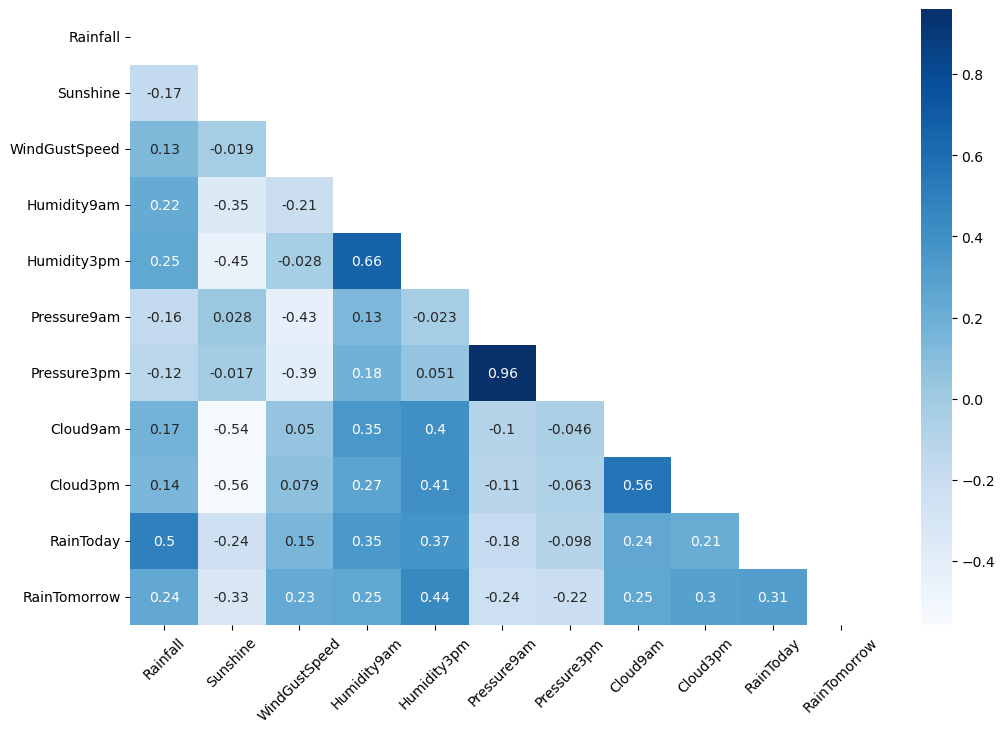

In [15]:
# Ploting correlation heatmap
final_data_corr = final_weather_data.corr()
mask = np.triu(np.ones_like(final_data_corr, dtype=bool))
plt.figure(figsize=(12,8))
sns.heatmap(final_data_corr, annot=True, mask=mask, cmap='Blues')
plt.xticks(rotation=45)
plt.show()